<a href="https://colab.research.google.com/github/octagomez/TP_MARZO2022_REGRESION_LOGISTICA/blob/main/Matrices_200_Ejercicio_TP_MARZO_NARCI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 2.5 MB/s 


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import category_encoders as ce


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MATRIZ 200x3

In [3]:
# CREO UN VECTOR DE DISTRIBUCION NORMAL 20
da = np.random.normal(loc=0, scale=1, size=100).reshape(100,1)
da2 = np.random.normal(loc=10, scale=15, size=100).reshape(100,1)
da = np.append(da, da2 , axis=0)
da
# CREO UN VECTOR DE DISTRIBUCION UNIFORME
rd = np.random.uniform(low=0, high=1.5, size=100).reshape(100,1)
rd2 = np.random.uniform(low=1.6, high=3, size=100).reshape(100,1)
rd = np.append(rd, rd2 , axis=0)
# CREO UN VECTOR DE DISTRIBUCION SESGADA
rs =np.random.lognormal(2,3,100).reshape(100,1)
rs2 =np.random.lognormal(0,3,100).reshape(100,1)
rs = np.append(rs, rs2 , axis=0)

In [4]:
# INCORPORO LOS DATOS A UNA MATRIZ
# https://www.delftstack.com/es/howto/numpy/numpy-add-column/#:~:text=append()-,La%20funci%C3%B3n%20numpy.,valores%20a%20el%20array%20preexistente.
XU = np.append(da, rd , axis=1)
# VEO LA MATRIZ
#print("VECTOR NORMAL", da)
#print("VECTOR UNIFORME",rd)
#print("MATRIZ_1", XU)
# INCORPORP LA TERCERA COLUMNA A LA MATRIZ
XU_s = np.append(XU, rs , axis=1)
#print("MATRIZ_2", XU)
XU.shape

print("DISTRIBUCION NORMAL \nMEDIA: ", da.mean(), " // VARIANZA :", da.var()  )

DISTRIBUCION NORMAL 
MEDIA:  4.730124658390332  // VARIANZA : 134.93996789061768


## DEFINO EL VECTOR Y

In [5]:
# XU_s_t = XU_s.transpose()
# XU_s_t.shape
# y_test_t = pd.DataFrame(XU_s_t)
# y_test_DNORMAL = pd.DataFrame(XU_s ,columns=[0])
# print(XU_x)
print(XU_s)

[[ 3.92550652e-01  9.71986377e-01  3.28460435e+01]
 [ 1.40371887e-01  3.68631543e-02  7.33360380e+02]
 [-8.88887203e-01  5.05516939e-01  1.23242691e+03]
 [ 1.35946280e+00  8.07849388e-02  2.38605897e-01]
 [-3.16574132e-01  4.04905067e-01  4.42255500e-01]
 [-4.37651047e-01  8.91771943e-01  5.88196647e+01]
 [-6.03674196e-01  4.57282615e-01  4.14432586e-02]
 [-6.67940549e-02  6.90531424e-02  3.69984026e-02]
 [-9.33311947e-01  7.44089340e-01  1.37945084e+00]
 [ 3.59107120e+00  3.67642449e-01  1.30094071e-01]
 [-3.30191835e-01  7.41615356e-01  3.98289524e+01]
 [-1.01344122e+00  5.01347210e-01  1.49171244e+01]
 [ 1.14268343e+00  6.28110324e-01  1.06206515e+01]
 [-6.83632803e-01  5.13129740e-01  1.03685533e+02]
 [-3.89253624e-01  9.16578122e-01  7.39247961e-01]
 [ 7.80558511e-01  1.47194925e-01  1.23898488e+01]
 [ 3.63034595e-01  1.30935576e+00  3.25778462e+01]
 [-1.59753524e-01  1.29884189e+00  3.10263151e+00]
 [ 3.87700918e-01  1.09412855e-01  6.23736826e+01]
 [-7.63409291e-01  1.22297738e+

In [6]:
y_20 =np.array([0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1
                ])

In [7]:
print(da.shape)
print(y_20.shape)

(200, 1)
(200,)


In [8]:
# Asi veremos información estadística básica de nuestro set de datos. La Media, el desvío estándar, 
# valores mínimo y máximo de cada característica:
# VAMOS A CONVERTIR LA MATRIZ DE NP a UN DF 
df = pd.DataFrame(XU_s)
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,4.730125,1.553160,100.722122
std,11.645517,0.901088,496.878304
min,-25.924831,0.021654,0.000282
25%,-0.730342,0.763615,0.516954
50%,0.506066,1.550596,3.119329
75%,9.077540,2.418293,22.234160
max,44.729387,2.990291,6114.896754


Text(0, 0.5, 'Dist. Sesgada')

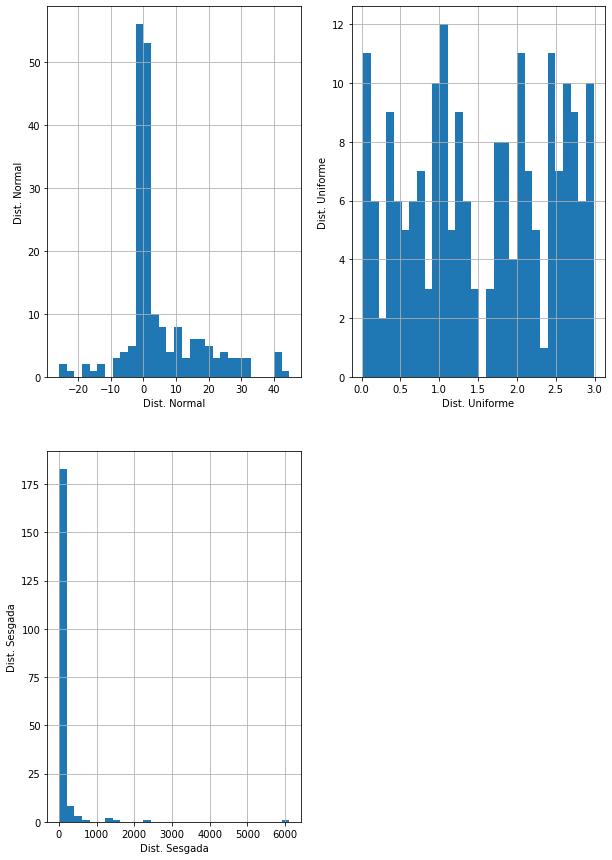

In [9]:
# Dibujamos los histogramas para checkear la distribución de las variables usando el dataframe df20:
plt.figure(figsize = (10,15))

plt.subplot(2,2,1)
fig =df[0].hist(bins=30)
fig.set_xlabel('Dist. Normal')
fig.set_ylabel('Dist. Normal')

plt.subplot(2,2,2)
fig =df[1].hist(bins=30)
fig.set_xlabel('Dist. Uniforme')
fig.set_ylabel('Dist. Uniforme')

plt.subplot(2,2,3)
fig =df[2].hist(bins=30)
fig.set_xlabel('Dist. Sesgada')
fig.set_ylabel('Dist. Sesgada')


Text(0, 0.5, '')

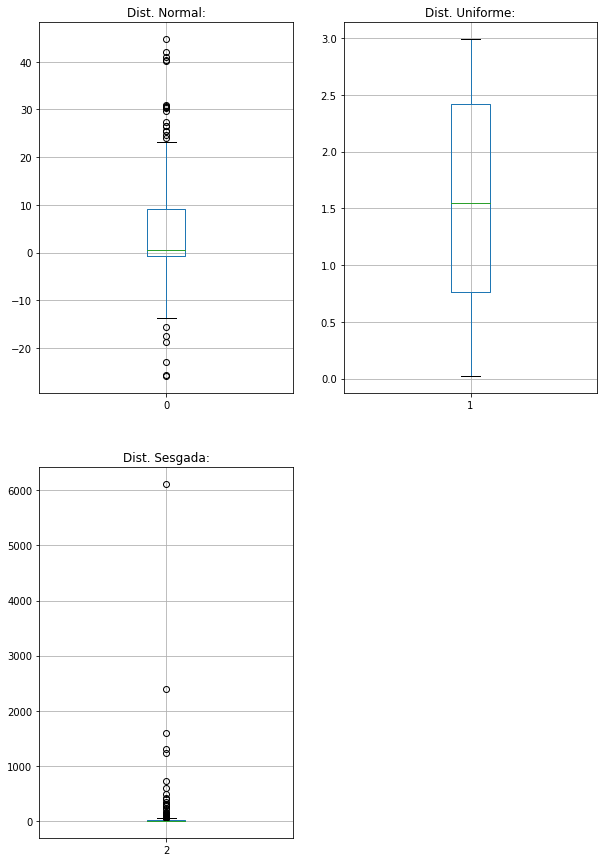

In [14]:
# Hacemos gráficos de cajas y bigotes de cada columna:
plt.figure(figsize = (10,15))
plt.subplot(2,2,1)
fig = df.boxplot(column = 0)
fig.set_title('Dist. Normal:')
fig.set_ylabel('')

# plt.figure(figsize = (8,10))
plt.subplot(2,2,2)
fig = df.boxplot(column = 1) 
fig.set_title('Dist. Uniforme:')
fig.set_ylabel('')

# plt.figure(figsize = (8,10))
plt.subplot(2,2,3)
fig = df.boxplot(column = 2)
fig.set_title('Dist. Sesgada:')
fig.set_ylabel('')


In [15]:
# train a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(XU_s,y_20,test_size=0.2)


In [32]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0) # OBTENGO Model accuracy score: 0.9500 Confusion matrix
                                                                                                          # [[10  0]
                                                                                                          # [ 1  9]]
#logreg = LogisticRegression(solver='newton-cg', random_state=0) # Model accuracy score: 1.0000 Confusion matrix
                                                                                                # [[10  0]
                                                                                                # [ 0 10]]
#logreg = LogisticRegression(solver='sag', random_state=0) # Model accuracy score: 0.9500 Confusion matrix
                                                                                          # [[ 9  1]
                                                                                          # [ 0 10]]
#logreg = LogisticRegression(solver='saga', random_state=0) # Model accuracy score: 0.9000 Confusion matrix
                                                                                          # [[9 1]
                                                                                          # [1 9]]
#logreg = LogisticRegression(solver='lbfgs',random_state=0) # Model accuracy score: 1.0000 Confusion matrix
                                                                                          # [[10  0]
                                                                                          # [ 0 10]]
# fit the model
logreg.fit(X_train, y_train)

# Reviso la influencia de cada columna:
print(logreg.coef_)


[[ 5.35090395e-02  2.78729590e+00 -2.11484056e-03]]


In [17]:
# ESTA ES LA PREDICCION
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [34]:
# CALCULO LA PRESICION DEL ALGORITMO DE PREDICCION COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION
# La métrica accuracy representa el porcentaje total de valores correctamente
from sklearn.metrics import accuracy_score

# FUNCION DE CALCULO DE SCORE
# accuracy_score(y_test, y_pred_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# Vemos las puntuaciones en el conjunto de entrenamiento y prueba: desde el modelo
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score:     {:.4f}'.format(logreg.score(X_test, y_test)))

Model accuracy score: 1.0000
Training set score: 0.9938
Test set score:     1.0000


In [19]:
# Creamos nuestra Matriz de Confusión:
# COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21  0]
 [ 0 19]]

True Positives(TP) =  21

True Negatives(TN) =  19

False Positives(FP) =  0

False Negatives(FN) =  0


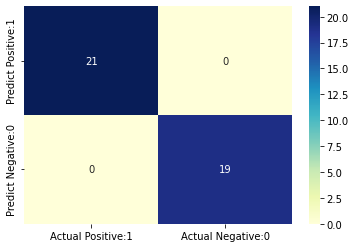

In [20]:
# Visualizamos la Matriz de Confusión:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
# El Informe de Clasificación es otra forma de evaluar el rendimiento del modelo de clasificación.
# Muestra las puntuaciones de precisión, recuperación, f1 y soporte para el modelo:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [35]:
# aqui se observa que variable tiene mayor influencia
logreg.coef_

array([[ 5.35090395e-02,  2.78729590e+00, -2.11484056e-03]])

## SUPUESTOS DE LA REGRESION LOGISTICA

## SUPUESTO 1 - Tipo de resultado apropiado
REGRESION LOGISTICA: la variable de respuesta es binaria [0,1]



In [23]:
# EVALUO LA SALIDA (OUTPUT) DEBE TENER  2 VALORES
# la funcion unique de la libreria numpy nos permite leer un array de numpy y su salida son valores unicos
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
print(np.unique(y_20))

[0 1]


In [24]:
# EVALUO LA CANTIDAD DE VALORES QUE HAY PARA CADA UNO
df_y = pd.DataFrame(y_20)
df_y.groupby([0]).size()

0
0    100
1    100
dtype: int64

## SUPUESTO 2 - Linealidad de variables independientes y probabilidades logarítmicas

REGRESION LOGISTICA: Existe una relación lineal entre las variables explicativas y el logit de la variable de respuesta

## **FUNCION LOGIT**

* La función logit es una parte importante de la regresión logística
**En matemáticas, especialmente aquellas aplicadas en estadística, el logit de un número p entre 0 y 1 es**

La base de la función logaritmo usada aquí es de poca importancia, siempre y cuando **sea mayor que 1**, aunque se usa a menudo el logaritmo natural con base e.

**La función logit es la inversa del "sigmoide", o función "logística".**

* Si p es una probabilidad entonces p/(1 − p) es la razón de momios, y el logit de la probabilidad es el logaritmo de la razón de momios; 
* **La diferencia entre los logits de dos probabilidades es el logaritmo del odds ratio (OR), obteniéndose así un mecanismo aditivo para combinar odds-ratios.**

# Prueba de caja-Tidwell

Uno de los supuestos importantes de la regresión logística es la linealidad del logit sobre las covariables continuas. Esta suposición significa que las relaciones entre los predictores continuos y el logit (logaritmo de probabilidades) son lineales.
* La transformación de Box-Tidwell (prueba) se puede utilizar para probar la 
linealidad en el supuesto logit cuando se realiza una regresión logística.
* **Comprueba si la transformada logit es una función lineal del predictor, agregando efectivamente la transformada no lineal del predictor original como un término de interacción para probar si esta adición no mejoró la predicción.** 
* Un valor **p estadísticamente significativo** del término de interacción en la transformación de Box-Tidwell **significa que se viola la suposición de linealidad**
* **Si se encuentra que una variable no es lineal**, podemos resolverla incorporando términos polinómicos de orden superior para esa variable en el análisis de regresión para capturar la no linealidad (por ejemplo, x^2). **Otra solución a este problema es la categorización de las variables independientes. Eso es transformar variables métricas a nivel ordinal y luego incluirlas en el modelo.**

### LOGARITMO DE ODD

In [25]:
# VAMOS A CONVERTIR LA MATRIZ DE NP a UN DF 
df = pd.DataFrame(XU_s)

# CREAMOS UNA COPIA DEL DF ORIGINAL PARA NO ALTERAR EL ORIGINAL
df_lt = df.copy()  # lt = logit transform

# Add logit transform interaction terms (natural log) for continuous variables e.g. Age * Log(Age)
for var in df_lt.columns:
    df_lt[f'{var}:Log_{var}'] = df_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df_lt.head()
# ESTA FUNCION GENERA COLUMNAS NUEVAS POR CADA UNA DE LAS VARIABLES SU LOGARITMO DE OD PARA PODER VER SU LINEALIDAD
# DEBE SER LINEAL LA VARIABLE DE INTERES (INDEPENDIENTE) CON RESPECTO A SU LOGARITMO DE ODD ( se calcula la variable * logaritmo de si mismo)

,0,1,2,0:Log_0,1:Log_1,2:Log_2
0,0.392551,0.971986,32.846044,-0.367070,-0.027618,114.692843
1,0.140372,0.036863,733.360380,-0.275615,-0.121668,4838.445747
2,-0.888887,0.505517,1232.426913,NaN,-0.344850,8770.862654
3,1.359463,0.080785,0.238606,0.417477,-0.203252,-0.341908
4,-0.316574,0.404905,0.442256,NaN,-0.366076,-0.360822


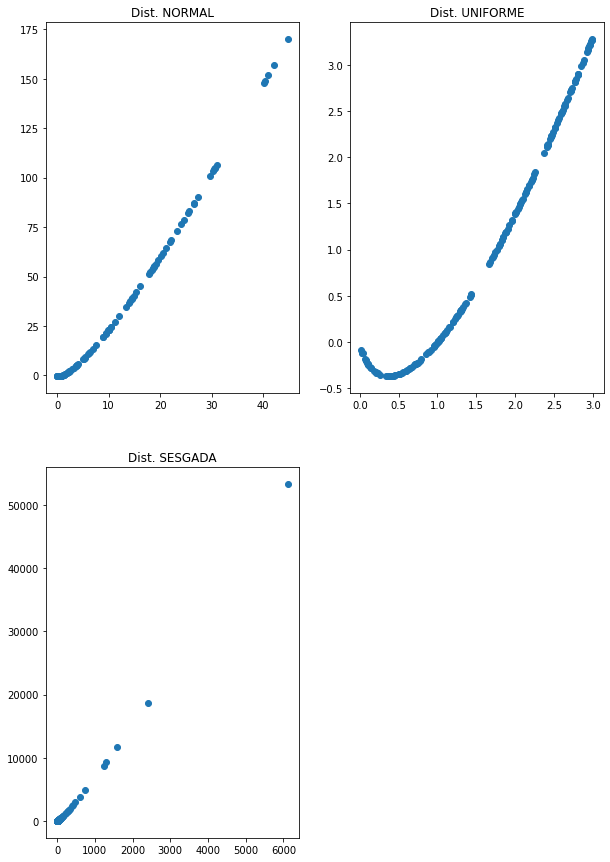

In [27]:
# GRAFICO LAS COLUMNAS PARA OBSERVAR SU LINEALIDAD
plt.figure(figsize = (10,15))

plt.subplot(2,2,1)

plt.title ('Dist. NORMAL')
plt.scatter(df_lt[0],df_lt['0:Log_0'])
# plt.figure(figsize=(10,15))
plt.subplot(2,2,2)
plt.title ('Dist. UNIFORME')
plt.scatter(df_lt[1],df_lt['1:Log_1'])
# plt.figure(figsize=(10,15))
plt.subplot(2,2,3)
plt.title ('Dist. SESGADA')
plt.scatter(df_lt[2],df_lt['2:Log_2'])

In [30]:
df_lt.head()
print(df_lt.columns.tolist())
df_lt['0:Log_0']


[0, 1, 2, '0:Log_0', '1:Log_1', '2:Log_2']


0      -0.367070
1      -0.275615
2            NaN
3       0.417477
4            NaN
         ...    
195    58.181345
196          NaN
197    55.126854
198     4.840085
199    39.100370
Name: 0:Log_0, Length: 200, dtype: float64

HACER EL CODIGO DONDE AL DF ANTES DE EJECUTAR EL GLM 
* Incorportar el vector Y_lt a X_lt 
* Eliminar los valores nan de X_lt (de cada columna, crear nuevos df para no afectar el df original.

SEDEBEN MANTENER LOS RESULTADOS DE Y ANTES DE ELIMINAR LOS NAN

In [44]:
# DEFINO LIBRERIAS DE STATSMODELS
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Redefine independent variables to include interaction terms
# Keep columns related to continuous variables
#selecciono las variables continuas del DF
continuous_var = df_lt.columns.tolist()
print(continuous_var)
cols_to_keep = continuous_var + df_lt.columns.tolist()[-len(continuous_var):]
print(cols_to_keep)

###
  # AYUDA!! NO SE XQ DA ERROR AL CREAR EL NUEVO DF X_lt
###

X_lt = df_lt['1:Log_1'] # no me deja crear ese DF xq dice que la key pasada no existe ??
y_lt = pd.DataFrame(y_20)
print(y_lt) 

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()
# logit_results = GLM(y_lt, X_lt, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

[0, 1, 2, '0:Log_0', '1:Log_1', '2:Log_2']
[0, 1, 2, '0:Log_0', '1:Log_1', '2:Log_2', 0, 1, 2, '0:Log_0', '1:Log_1', '2:Log_2']
     0
0    0
1    0
2    0
3    0
4    0
..  ..
195  1
196  1
197  1
198  1
199  1

[200 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


PerfectSeparationError: ignored

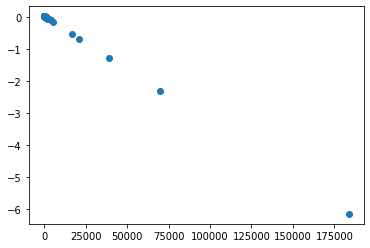

In [ ]:
predicted = logit_results.predict(X_lt_constant)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x=X_lt.values, y=log_odds);
plt.show()

## SUPUESTO 3 - No hay valores atípicos fuertemente influyentes
* Los valores influyentes son puntos de datos individuales extremos que pueden alterar la calidad del modelo de regresión logística.
* La distancia de Cook es una estimación de la influencia de un punto de datos. Tiene en cuenta tanto el apalancamiento como el residual de cada observación. * La distancia de Cook es un resumen de cuánto cambia un modelo de regresión cuando se elimina la i -ésima observación.
* Una regla general es que cualquier observación con una distancia de Cook superior a 4/n (donde n = observaciones totales) se considera influyente ( https://www.statology.org/cooks-distance-python/ y https: //www.scikit-yb.org/en/latest/api/regressor/influence.html?highlight=cook#module-yellowbrick.regressor.influence ), aunque hay valores de corte aún más genéricos de >0.5-1.0.
* Para valores atípicos, podemos usar los residuos estandarizados absolutos para identificarlos (std resid > 3)
Referencia: https://www.statsmodels.org/dev/examples/notebooks/generated/influence_glm_logit.html

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Use GLM method for logreg here so that we can retrieve the influence measures
# USO LAS MATRICES DE POBLACION
logit_model = GLM(y_20, XU_s, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.27
Date:                Wed, 13 Apr 2022   Deviance:                       200.54
Time:                        17:35:46   Pearson chi2:                     264.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0568      0.020      2.828      0.0

In [ ]:
# Use GLM method for logreg here so that we can retrieve the influence measures
# USO LAS MATRICES DE POBLACION
# logit_model = GLM(y_train, X_train, family=families.Binomial())
# logit_results = logit_model.fit()
# print(logit_results.summary())

In [ ]:
# Use GLM method for logreg here so that we can retrieve the influence measures
# USO LAS MATRICES DE POBLACION
# logit_model = GLM(y_train, X_train, family=families.Binomial())
# logit_results = logit_model.fit()
# print(logit_results.summary())

In [ ]:
from scipy import stats
# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df

,cooks_d,std_resid
0,7.823770e-13,0.224869
1,8.657494e-04,0.832654
2,2.298890e-03,1.015075
3,3.068296e-05,0.655351
4,4.721934e-05,0.669238
...,...,...
195,2.034917e-04,0.404977
196,1.723450e-02,0.978889
197,8.359217e-03,0.847453
198,8.925918e-03,0.856785


In [ ]:
# Set Cook's distance threshold
cook_threshold = 4 / len(XU_s)
print(f"Threshold for Cook Distance = {cook_threshold}")

Threshold for Cook Distance = 0.02


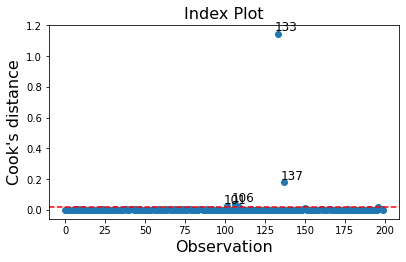

In [ ]:
# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [ ]:
# Find number of observations that exceed Cook's distance threshold
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(XU_s)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 2.0%


In [ ]:
# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(XU_s)),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')

Proportion of highly influential outliers = 0.5%


In [ ]:
# Display top 5 most influential outliers
extreme.sort_values("cooks_d", ascending=False).head()
extreme

,cooks_d,std_resid
133,1.147087,9.816247


In [ ]:
# Deep dive into index 297 (extreme outlier)
# lo paso de numpy a pandas
df_x = pd.DataFrame(XU_s)
# corro el balance
df_x.iloc[109]  # 0 = Did not survive


0   -16.798897
1     1.860059
2     0.189975
Name: 109, dtype: float64

In [ ]:
df_y = pd.DataFrame(y_20)
df_y.iloc[109]  # 0 = Did not survive

0    1
Name: 109, dtype: int64

* Es importante tener en cuenta que para los puntos de datos con distancias de Cook relativamente altas, no significa automáticamente que deba eliminarse inmediatamente del conjunto de datos. Es esencialmente un indicador para resaltar qué puntos de datos vale la pena analizar más a fondo, para comprender si son anomalías reales o no.
* En la práctica, una evaluación de valores "grandes" es un juicio basado en la experiencia y el conjunto particular de datos que se analiza.
* Además, según nuestro umbral predefinido (4/N), solo el 5 % (51/891) de los puntos se encuentran en la zona de valores atípicos, que también es pequeña. El problema surge cuando hay una cantidad significativa de puntos de datos clasificados como valores atípicos.
* La gestión de valores atípicos está fuera del alcance de esta demostración.

## Supuesto 4 - Ausencia de multicolinealidad


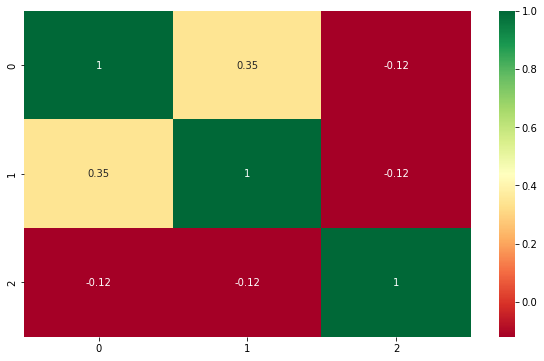

In [ ]:
# CREO LA MATRIZ DE CORRELACION
# uso la matriz XU_s convertida en DF de pandas
# df_x = pd.DataFrame(XU_s)

corrMatrix = df_x.corr()
plt.subplots(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

* La matriz de correlación puede ser difícil de interpretar cuando hay muchas variables independientes
* Además, no todos los problemas de colinealidad pueden detectarse mediante la inspección de la matriz de correlación: es posible que exista colinealidad entre tres o más variables incluso si ningún par de variables tiene una correlación particularmente alta.
* Como tal, usamos el factor de inflación de varianza (VIF) en su lugar

#### Factor de inflación de varianza (VIF)
* Incluir constante en el cálculo de VIF. Referencia: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

In [ ]:
# Use variance inflation factor to identify any significant multi-collinearity

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

# CREA CONSTANTE
X_constant = sm.add_constant(XU_s, prepend=False)
# CONVIERTO A UN DF
X_constant = pd.DataFrame(X_constant)
calc_vif(X_constant) # Include constant in VIF calculation in Python

,variables,VIF
0,0,1.145421
1,1,1.145541
2,2,1.021761
3,3,4.245463


* El umbral para VIF suele ser 5 (es decir, los valores superiores a 5 significan que hay presencia de multicolinealidad)
* Como todas las variables tienen VIF <5, significa que no hay multicolinealidad, y se cumple este supuesto
* Echemos un vistazo a la situación en la que no soltamos la primera variable al obtener maniquíes:

## Supuesto 5 - Independencia de las observaciones

* Los términos de error deben ser independientes. Es decir, los puntos de datos no deben ser de ningún diseño de muestras dependientes, por ejemplo, mediciones de antes y después o emparejamientos.

In [ ]:
# Setup logistic regression model (using GLM method so that we can retrieve residuals)
X_constant = sm.add_constant(XU_s, prepend=False)
logit_model = GLM(y_20, X_constant, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


PerfectSeparationError: ignored

ERROR: PerfectSeparationError: Perfect separation detected, results not available

DESCRIPCION: Python ha detectado una separación completa o casi completa en uno o más de sus predictores y la variable de resultado.

* Esto sucede cuando todos o casi todos los valores en una de las categorías de predictores (o una combinación de predictores) están asociados con solo uno de los valores de resultado binarios. (Supongo que está intentando una regresión logística). Cuando esto sucede, no se puede encontrar una solución para el coeficiente predictor.

* Hay varias soluciones posibles. Dependiendo de cuántas variables haya en su análisis, puede intentar ejecutar tabulaciones cruzadas bidireccionales en su resultado y cada una de las variables predictoras para ubicar las celdas con cero observaciones y luego eliminar esa variable del análisis o usar menos categorías. Otra opción es ejecutar una regresión logística de Firth o una regresión penalizada.

### Comprobar series de residuos

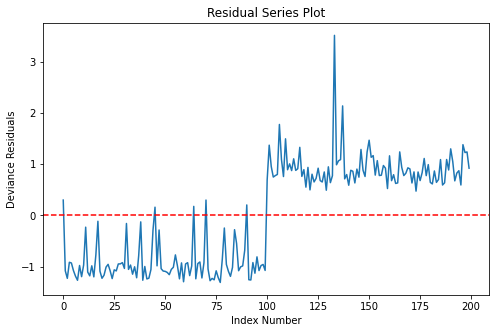

In [ ]:
# Generate residual series plot
# paso XU_s a DF
df_x = pd.DataFrame(XU_s)
# SCRIPT
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                    xlabel="Index Number", ylabel="Deviance Residuals")

# ax.plot(X.index.tolist(), stats.zscore(logit_results.resid_pearson))
ax.plot(df_x.index.tolist(), stats.zscore(logit_results.resid_deviance))
plt.axhline(y=0, ls="--", color='red');

* A partir de la gráfica anterior de Desviación residual versus número índice, podemos ver que se cumple la suposición de independencia de los errores.

### Investigación adicional sobre parcelas de dependencia residual (Opcional)
* Esta es una investigación adicional. La verificación anterior de las series de residuos (basadas en números índice) es suficiente
Referencia: https://freakonometrics.hypotheses.org/8210

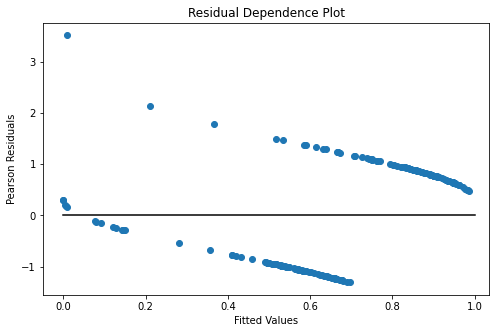

In [ ]:
# BASADO EN EL SCRIPT ANTERIOR, UTILIZAMOS ax COMO 
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(
            111,
            title="Residual Dependence Plot",
            xlabel="Fitted Values",
            ylabel="Pearson Residuals")

# ax.scatter(logit_results.mu, stats.zscore(logit_results.resid_pearson))
ax.scatter(logit_results.mu, stats.zscore(logit_results.resid_deviance))
ax.axis("tight")
ax.plot([0.0, 1.0], [0.0, 0.0], "k-");

* Agregue una línea de suavizado de diagrama de dispersión ponderado localmente (LOWESS) para visualizar mejor la independencia

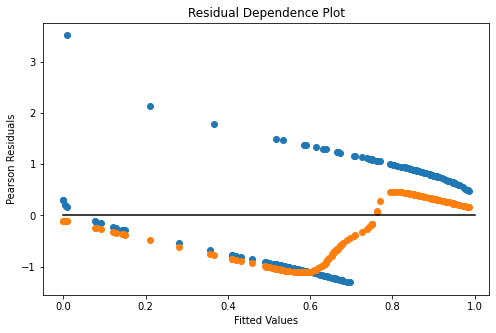

In [ ]:
# Setup LOWESS function
lowess = sm.nonparametric.lowess

# Get y-values from LOWESS (set return_sorted=False)
y_hat_lowess = lowess(logit_results.resid_pearson, logit_results.mu, 
                      return_sorted = False,
                      frac=2/3)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111,
    title="Residual Dependence Plot",
    xlabel="Fitted Values",
    ylabel="Pearson Residuals")

# ax.scatter(logit_results.mu, stats.zscore(logit_results.resid_pearson))
ax.scatter(logit_results.mu, stats.zscore(logit_results.resid_deviance))
ax.scatter(logit_results.mu, y_hat_lowess)
ax.axis("tight")
ax.plot([0.0, 1.0], [0.0, 0.0], "k-");

## Supuesto 6 - Tamaño de muestra suficientemente grande
* La regla de oro es tener por lo menos 10-20 instancias del resultado menos frecuente para cada variable predictora en su modelo

* A partir de los recuentos de valores (proximo script), podemos ver que esta suposición se cumple

* Otra regla general es tener al menos 500 observaciones en todo el conjunto de datos.

En general, tenemos 891 observaciones, que es un tamaño de conjunto de datos decente para trabajar

In [ ]:
# Find total number of observations
print("Total number of observations:", len(XU_s))

Total number of observations 200


In [ ]:
# Get value counts for independent variables (mainly focus on categorical)
# paso XU_s a DF
df_x = pd.DataFrame(XU_s)

for col in df_x.columns.to_list()[0:]:
    if df_x.dtypes[col] == 'uint8': # Keep categorical variables only
        print(df_x[col].value_counts())

-0.007544     1
-9.529795     1
 29.790291    1
 13.308687    1
 44.844507    1
             ..
 0.156350     1
-0.614033     1
 1.134480     1
-0.416485     1
 8.664314     1
Name: 0, Length: 200, dtype: int64
0.520566    1
2.762575    1
2.172481    1
2.151612    1
2.772176    1
           ..
0.973663    1
1.271625    1
0.404716    1
1.422110    1
2.134057    1
Name: 1, Length: 200, dtype: int64
7311.389933     1
1095.105956     1
27.866091       1
16.515117       1
1.872707        1
               ..
262.473780      1
10528.265959    1
11.843263       1
2.606269        1
16.383355       1
Name: 2, Length: 200, dtype: int64


In [ ]:
df_x.dtypes

0    float64
1    float64
2    float64
dtype: object

EN ESTE CASO LA SALIDA ES NULA YA QUE LOS DATOS EN EL DF SON FLOAT64